In [1]:
# standard deviation
# import numpy as np

# arr = np.array([5, 7, 3, 7, 10])
# mean = arr.mean()


# print(mean)



In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/kaggle/input/k-means/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
df.drop('Name', axis=1, inplace=True)
df.head()


,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [5]:
# check nul
df.isnull().sum()

Age          0
Income($)    0
dtype: int64

In [6]:
# normanilaztion
df = (df - df.min()) / (df.max() - df.min())


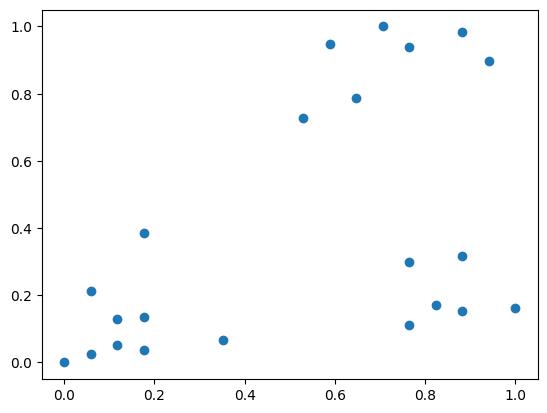

In [7]:
import matplotlib.pyplot as plt


plt.scatter(df["Age"], df['Income($)'])

In [8]:
#k-means
from sklearn.cluster import KMeans

In [9]:
km=KMeans(n_clusters=3, random_state=81)

In [10]:
km.fit(df)

KMeans(n_clusters=3, random_state=81)

In [11]:
km.predict(df)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [12]:
# same kal
cluster_label=km.fit_predict(df)
cluster_label

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [13]:
df['cluster']=cluster_label
df.head()

,Age,Income($),cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1


In [14]:
df_0=df[df['cluster']==0]
df_1=df[df['cluster']==1]
df_2=df[df['cluster']==2]

In [15]:
# show cluster center
km_center=km.cluster_centers_

In [16]:
# sob gula er 0 number print : means all
print(km_center[:,0] )  #x
print(km_center[:,1])    #y

[0.1372549  0.72268908 0.85294118]
[0.11633428 0.8974359  0.2022792 ]


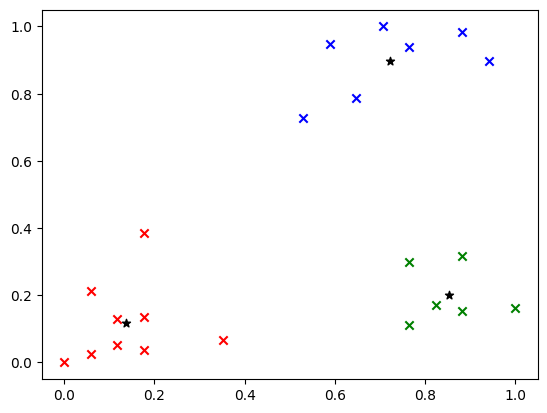

In [17]:
plt.scatter(df_0["Age"], df_0['Income($)'], marker='x', color='red')
plt.scatter(df_1["Age"], df_1['Income($)'], marker='x', color='blue')
plt.scatter(df_2["Age"], df_2['Income($)'], marker='x', color='green')
plt.scatter(km_center[:,0], km_center[:,1], marker='*', color='black' )

In [18]:
km.inertia_   #k=3

0.4750783498553094

# Elbow Method

In [19]:
sse=[]  #sum of sqare error

for k in range(1,10):
    km=KMeans(n_clusters=k)
    km.fit_predict(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

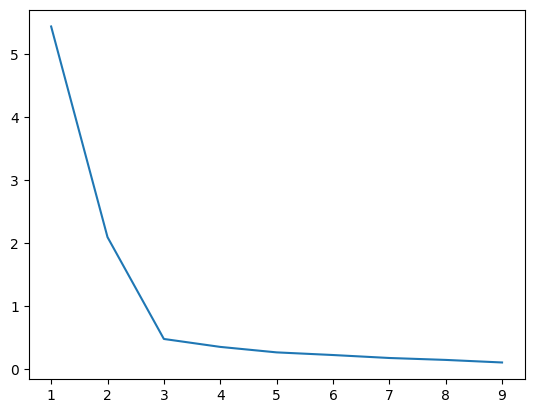

In [20]:
plt.plot(range(1,10), sse )
